In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

pd.set_option('display.max_columns', 500)
sns.set()

In [55]:
df = pd.read_csv('ugse.csv')

df.columns = df.iloc[0]
df.rename(columns={ df.columns[2]: "permission" }, inplace = True)
df = df[2:]

cols = df.columns

df = df[df[cols[0]]  == '100']
df = df[df[cols[2]]  == 'I agree']
df = df[df[cols[3]]  != 'No - I\'ve never worked']

df.drop(df.columns[[0,1,2,3]], axis=1, inplace=True)

cols = df.columns

# They did not complete: 20, 110, 111, 127
df.drop([20,110,111,127], inplace=True)

# Some null values of Q7-Q15
df[cols[7:16]] = df[cols[7:16]].fillna('Neither agree nor disagree')

# df.reset_index(drop=True, inplace=True)
color = ['r', 'lightcoral', 'lightgrey', 'lightgreen', 'g']

In [3]:
df

,Please provide your undergraduate University name,What is your gender?,What is your highest level of degree or education? - Selected Choice,Which year did you complete your undergraduate or bachelors degree?,How many years of industry experience do you have?,What is your current job description? - Selected Choice,Do you think the current curricula/syllabus for the undergraduate software engineering courses are s - Selected Choice,"Rate your undergraduate projects (course projects or final year project) for the following criteria: - Used standard software development tools (e.g., version control systems)","Rate your undergraduate projects (course projects or final year project) for the following criteria: - Used software development frameworks (e.g., Spring, Django etc.)",Rate your undergraduate projects (course projects or final year project) for the following criteria: - Used software development life cycles (SDLC),Rate your undergraduate projects (course projects or final year project) for the following criteria: - Performed requirements analysis,"Rate your undergraduate projects (course projects or final year project) for the following criteria: - Applied different software testings (e.g., unit testing etc.)",Rate your undergraduate projects (course projects or final year project) for the following criteria: - Used project management tools,Rate your undergraduate projects (course projects or final year project) for the following criteria: - Used bug tracking systems,Rate your undergraduate projects (course projects or final year project) for the following criteria: - Were similar to real-life projects,Rate your undergraduate projects (course projects or final year project) for the following criteria: - Were evaluated properly,Internship should be made mandatory as part of the curricula or degree requirement. - Selected Choice,How extensively did you participate in programming contests or solve ACM problems? - Selected Choice,Programming contests or solving ACM problems help build software development skills. - Selected Choice,What do you think about the people who participate in programming contests or solve ACM problems? - Selected Choice,"Undergraduate course projects should be given more time. That is, they should span or continue multiple semesters or years. - Selected Choice",Software engineering course instructors should have industry experience. - Selected Choice,"Universities should teach communication and other ""soft"" skills. - Selected Choice","After your graduation, how much effort did you have to put to become effective (i.e., get up to speed) in your role at work? - Selected Choice",How helpful was your undergrad team projects experience for your current job? - Selected Choice,"After I joined the team, my company provided formal training (e.g., on-boarding, orientation etc.) on the code base, tools and/or processes. - Selected Choice","Based on your own experience, how much do you think the current undergraduate education prepares an individual for the software industry? - Selected Choice",Both male and female graduates receive equal opportunity at the time of recruitment. - Selected Choice,The workplace environment of the software/IT industry is more comfortable for a man than a woman. - Selected Choice
2,Shahjalal University of Science and Technology,Male,Ph.D.,2014,2 to 5 years,Other (please specify),Strongly disagree - should be totally changed,Somewhat disagree,Somewhat disagree,Somewhat disagree,Somewhat agree,Strongly disagree,Somewhat agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Solved a few,Somewhat agree,Hard to work with,Neither agree nor disagree,Strongly agree,Strongly agree,A moderate amount,Not helpful at all,Strongly disagree,A little,Other (I want to share my opinion),Somewhat agree
3,University of Dhaka (DU),Male,"Masters, M.Sc., MS",2010,5 to 10 years,Software Developer/Engineer,Agree - minor changes are needed,Strongly disagree,Strongly disagree,Strongly disa

#

### 0. Please provide your undergraduate University name

In [ ]:
df.groupby(cols[0]).size() #.plot(kind='bar')
# sns.countplot(df[cols[0]], color='gray')

### 1. What is your gender?

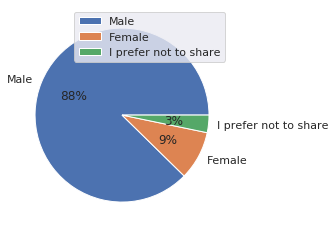

In [72]:
# df1 = df.groupby(cols[1]).size()
# df1 = df1[['Male', 'Female', 'I prefer not to share']]
# df1.plot(kind='pie', autopct='%1.0f%%',  labels=['','',''])
# # plt.legend(df1.column)
# plt.legend(['Male', 'Female', 'I prefer not to share'])

df1 = df[cols[1]].value_counts()
df1.plot(kind='pie', autopct='%1.0f%%')
plt.ylabel('')
plt.legend()

### 2. What is your highest level of degree or education?

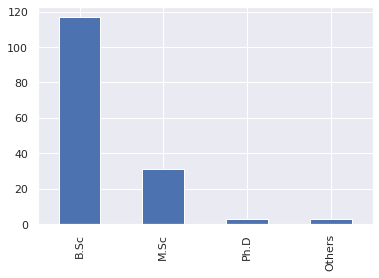

In [93]:
df1 = df[cols[2]].value_counts()

di = {'Bachelors, B.Sc., BS':'B.Sc',
      'Masters, M.Sc., MS':'M.Sc', 
      'Other (please specify)': 'Others',
      'Ph.D.': 'Ph.D'
     }

df1 = df1.rename(index=di)
df1.plot(kind='bar')

### 3. Which year did you complete your undergraduate or bachelors degree?

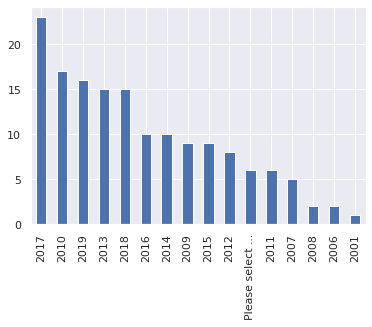

In [95]:
# df.groupby(cols[3]).size().plot(kind='bar')
df1 = df[cols[3]].value_counts()
df1.plot(kind='bar')

### 4. How many years of industry experience do you have?

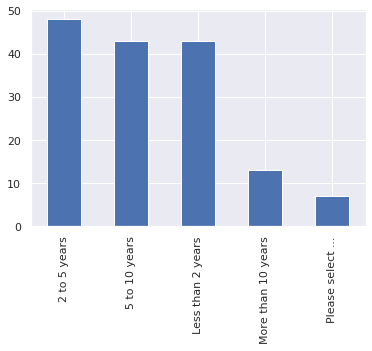

In [96]:
df1 = df[cols[4]].value_counts()
df1.plot(kind='bar')

### 5. What is your current job description?

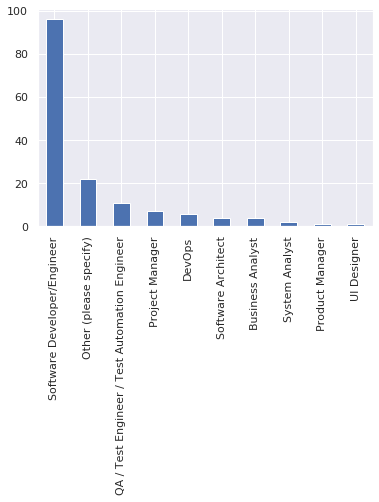

In [97]:
df1 = df[cols[5]].value_counts()
df1.plot(kind='bar')

### A. Undergraduate Curricula

In [98]:
l = [6, 26]
for i in l:
    print(i, df[cols[i]].unique())

6 ['Strongly disagree - should be totally changed'
 'Agree - minor changes are needed' 'Neither agree nor disagree'
 'Disagree - major changes are needed'
 'Other (I want to share my opinion)'
 'Strongly agree - no change is needed' nan]
26 ['A little' 'A moderate amount' 'A lot' 'None at all' 'A great deal' nan
 'Other (I want to share my opinion)']


####  6. Do you think the current curricula/syllabus for the undergraduate software engineering courses are s - Selected Choice

Text(0, 0.5, '')

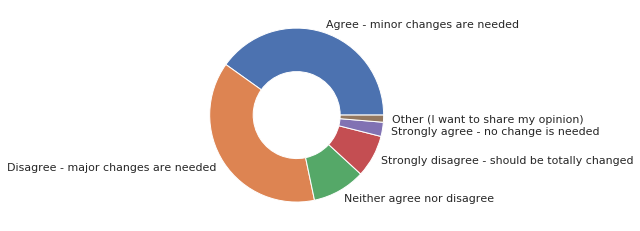

In [12]:
df1 = df[cols[6]].value_counts()
df1.plot(kind='pie', wedgeprops=dict(width=0.5))
plt.ylabel('')

#### 26. Based on your own experience, how much do you think the current undergraduate education prepares an individual for the software industry? - Selected Choice

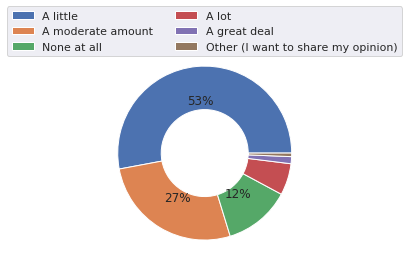

In [135]:
df1 = df[cols[26]].value_counts()

def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > 10 else ''

df1.plot(kind='pie', autopct=my_autopct, wedgeprops=dict(width=0.5), labels=['','','','','',''])
plt.ylabel('')

plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.2), labels=df1.index)


### B. Rate your undergraduate projects (course projects or final year project) for the following criteria: - 
- 7.  Used standard software development tools (e.g., version control systems)
- 8.  Used software development frameworks (e.g., Spring, Django etc.)
- 9. Used software development life cycles (SDLC)	
- 10. Performed requirements analysis
- 11. Applied different software testings (e.g., unit testing etc.)
- 12. Used project management tools
- 13. Used bug tracking systems
- 14. Were similar to real-life projects
- 15. Were evaluated properly

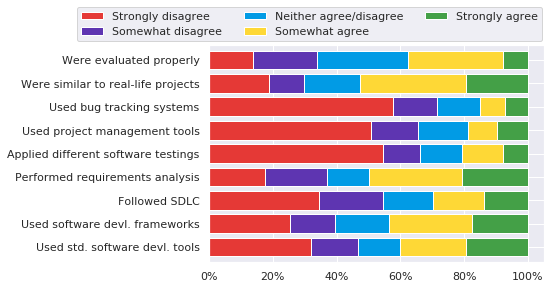

In [83]:
df1 = df[cols[7:16]].apply(pd.Series.value_counts)
df1 = df1/df1.sum()*100

color = ['#E53936', '#5E35B1', '#019BE5', '#FED836', '#44A047']

df1.columns = ['Used std. software devl. tools',
               'Used software devl. frameworks',
               'Followed SDLC',
              'Performed requirements analysis',
              'Applied different software testings',
              'Used project management tools',
              'Used bug tracking systems',
              'Were similar to real-life projects',
              'Were evaluated properly']

df1 = df1.T

df1 = df1[['Strongly disagree', 'Somewhat disagree', 'Neither agree nor disagree',
          'Somewhat agree', 'Strongly agree']]
df1.rename(columns={'Neither agree nor disagree': 'Neither agree/disagree'}, inplace=True)

ax = df1.plot(kind='barh', color=color, stacked=True, width=0.80)

import matplotlib.ticker as mtick
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
ax.tick_params(axis='x', which='minor', bottom=False)
# plt.grid(color='black', linewidth=0.7)
# ax.yaxis.grid(False)

# ax.axes.get_xaxis().set_visible(False)

plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.300, 1.2))
# ax.spines['bottom'].set_position('zero')

# for p in ax.patches:
#     left, bottom, width, height = p.get_bbox().bounds
#     if width <=15: continue
#     ax.annotate(str(int(round(width)))+'%', xy=(left+width/2, bottom+height/2), 
#                 ha='center', va='center')

### C. Pedagogical Issues
#### 21. Software engineering course instructors should have industry experience. - Selected Choice
#### 23. After your graduation, how much effort did you have to put to become effective (i.e., get up to speed) in your role at work? - Selected Choice
#### 25. After I joined the team, my company provided formal training (e.g., on-boarding, orientation etc.) on the code base, tools and/or processes. - Selected Choice

In [83]:
l = [21, 23, 25]
for i in l:
    print(i, df[cols[i]].unique())

21 ['Strongly agree' 'Neither agree nor disagree' 'Somewhat disagree'
 'Somewhat agree' 'Strongly disagree' nan
 'Other (I want to share my opinion)']
23 ['A moderate amount' 'None at all' 'A lot' 'A little' 'A great deal' nan
 'Other (I want to share my opinion)']
25 ['Strongly disagree' 'Strongly agree' 'Somewhat agree' 'Somewhat disagree'
 'Neither agree nor disagree' nan]


### D. Lack of communication and soft skills
#### 22. Universities should teach communication and other "soft" skills. - Selected Choice

<Figure size 144x72 with 0 Axes>

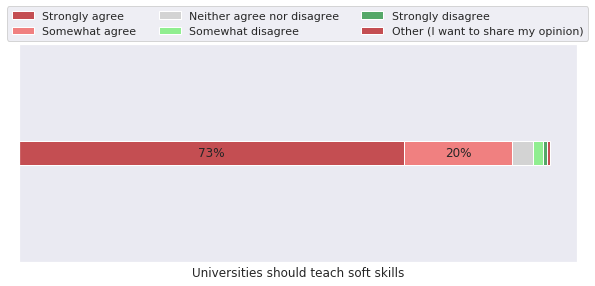

<Figure size 144x72 with 0 Axes>

In [136]:
df1 = df[[cols[22]]].apply(pd.Series.value_counts)
df1 = df1/df1.sum()*100
df1.columns = ['Universities should teach soft skills']

ax = df1.T.plot(kind='barh', color=color, stacked=True, width=0.06, figsize=(10,4))
ax.tick_params(axis=u'both', which=u'both',length=0)

# ax.xaxis.set_tick_params(0)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width <=15: continue
    ax.annotate(str(int(round(width)))+'%', xy=(left+width/2, bottom+height/2), 
                ha='center', va='center')
    
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.2))
plt.xlabel(df1.columns[0])
plt.xticks([], [])
plt.yticks([], [])

plt.figure(figsize=(2,1))

### E. Gender and Equity
#### 27. Both male and female graduates receive equal opportunity at the time of recruitment. - Selected Choice
#### 28. The workplace environment of the software/IT industry is more comfortable for a man than a woman. - Selected Choice

In [86]:
l = [27, 28]
for i in l:
    print(i, df[cols[i]].name, df[cols[i]].unique())

27 Both male and female graduates receive equal opportunity at the time of recruitment. - Selected Choice ['Other (I want to share my opinion)' 'Somewhat disagree' 'Somewhat agree'
 'Neither agree nor disagree' 'Strongly agree' 'Strongly disagree' nan]
28 The workplace environment of the software/IT industry is more comfortable for a man than a woman. - Selected Choice ['Somewhat agree' 'Neither agree nor disagree' 'Strongly disagree'
 'Somewhat disagree' 'Strongly agree' 'Other (I want to share my opinion)'
 nan]


### Improvement Suggestions
#### 16. Internship should be made mandatory as part of the curricula or degree requirement. - Selected Choice
#### 17. How extensively did you participate in programming contests or solve ACM problems? - Selected Choice
#### 18. Programming contests or solving ACM problems help build software development skills. - Selected Choice
#### 19.What do you think about the people who participate in programming contests or solve ACM problems?

In [88]:
l = [16, 17, 18, 19]
for i in l:
    print(i, df[cols[i]].unique())

16 ['Strongly agree' 'Somewhat agree' 'Somewhat disagree'
 'Neither agree nor disagree' 'Other (I want to share my opinion)'
 'Strongly disagree' nan]
17 ['Solved a few' 'A lot' 'Did not participate or solve'
 'Other (I want to share my opinion)' nan]
18 ['Somewhat agree' 'Strongly agree' 'Somewhat disagree'
 'Neither agree nor disagree' 'Strongly disagree' nan
 'Other (I want to share my opinion)']
19 ['Hard to work with' 'Easy to work with' 'Great team players'
 'I did not have such teammates' 'Extremely hard to work with'
 'Other (I want to share my opinion)' nan]


### Z. Not done
#### 20. Undergraduate course projects should be given more time. That is, they should span or continue multiple semesters or years. - Selected Choice
#### 24. Team projects helpful for your current job? - Selected Choice

Q24: [Optional]What would you suggest to change or improve in the under-graduate education to prepare a fresh graduate for the softwareindustry?
Q25: [Optional] If you want, you could provide anylist of resources that you found useful. For example, names ofsoftware engineering books, links, tools or techniques etc